# SANDBOX DISCRETIZACIÓN

In [1]:
#4 sujetos, 20 señales, 3 discretizaciones = 240 iteraciones.

In [2]:
library("entropy")
library("arules")
discretize <- arules::discretize

Loading required package: Matrix

Attaching package: 'arules'

The following object is masked from 'package:entropy':

    discretize

The following objects are masked from 'package:base':

    abbreviate, write



In [3]:
columnas = c("Time", "CBFVR", "ABP", "CBFVL", "ETCO2", "CrCPR", "RAPR", "HR", "SBP", "DBP", "PINXR", "MSER", "CrCPL", "RAPL", "SCBFVR", "DCBFVR", "SCBFVL", "DCBFVL", "PINXL", "MSEL")

In [4]:
hcs1 <- read.csv('HCS01M01.csv', na.strings = "?", header=FALSE)
names(hcs1) <- columnas
hcs4 <- read.csv('HCS04M01.csv', na.strings = "?", header=FALSE)
names(hcs4) <- columnas
ncs1 <- read.csv('NCS01M01.csv', na.strings = "?", header=FALSE)
names(ncs1) <- columnas
ncs4 <- read.csv('NCS04M01.csv', na.strings = "?", header=FALSE)
names(ncs4) <- columnas

In [5]:
subjects <- c(hcs1, hcs4, ncs1, ncs4)

In [6]:
discretize(x, method = "frequency", breaks = 3, 
  labels = NULL, include.lowest = TRUE, right = FALSE, dig.lab = 3,
  ordered_result = FALSE, infinity = FALSE, onlycuts = FALSE, 
  categories, ...)

ERROR: Error in eval(expr, envir, enclos): '...' usado en un contexto incorrecto


In [ ]:
#https://www.rdocumentation.org/packages/arules/versions/1.6-4/topics/discretize

In [7]:
length(colnames(hcs1))

[1] 20

In [8]:
            #hist(aux, breaks = breaks, main = "Equal Interval length")
            #abline(v = discretize(x, method = "interval", breaks = breaks, onlycuts = TRUE), col = "red")

In [9]:
out <- tryCatch(
    {
        # Just to highlight: if you want to use more than one 
        # R expression in the "try" part then you'll have to 
        # use curly brackets.
        # 'tryCatch()' will return the last evaluated expression 
        # in case the "try" part was completed successfully

        message("This is the 'try' part")

        readLines(con=url, warn=FALSE) 
        # The return value of `readLines()` is the actual value 
        # that will be returned in case there is no condition 
        # (e.g. warning or error). 
        # You don't need to state the return value via `return()` as code 
        # in the "try" part is not wrapped insided a function (unlike that
        # for the condition handlers for warnings and error below)
    },
    error=function(cond) {
        message(paste("URL does not seem to exist:", url))
        message("Here's the original error message:")
        message(cond)
        # Choose a return value in case of error
        return(NA)
    },
    warning=function(cond) {
        message(paste("URL caused a warning:", url))
        message("Here's the original warning message:")
        message(cond)
        # Choose a return value in case of warning
        return(NULL)
    },
    finally={
    # NOTE:
    # Here goes everything that should be executed at the end,
    # regardless of success or error.
    # If you want more than one expression to be executed, then you 
    # need to wrap them in curly brackets ({...}); otherwise you could
    # just have written 'finally=<expression>' 
        message(paste("Processed URL:", url))
        message("Some other message at the end")
    }
)    
return(out)

This is the 'try' part


ERROR: Error in paste("URL does not seem to exist:", url): cannot coerce type 'closure' to vector of type 'character'


ERROR: Error in paste("Processed URL:", url): cannot coerce type 'closure' to vector of type 'character'


In [10]:
"""
EN ESTE RECUADRO ITERARÉ SOBRE LAS 20 SEÑALES PROPORCIONADAS Y PARA CADA SEÑAL SE ITERARÁ SOBRE
LOS TRES MÉTODOS DE DISCRETIZACIÓN: INTERVAL, FREQUENCY Y CLUSTER.
CADA MÉTODO ITERA SOBRE LOS 4 SUJETOS, 2 CON NORMOCAPNIAY 2 CON HYPERCAPNIA

10/10/2019: SE UTILIZAN TRY-CATCH'es DADO QUE HAY COMBINACIONES DE SEÑALES/MÉTODOS QUE NO PUEDEN DISCRETIZARSE POR SER 
SEÑALES UNIFORMES.

"""
methods = c("interval", "frequency", "cluster")
signals = colnames(hcs1)[2:20]
breaks = 5
for (signal in signals)
{   
    cat("Current Signal: ", signal)
    print("")
    for (method in methods)
    {print("")
        tryCatch(
            {
            cat("  -  Current subject: ncs1")
            aux = table(discretize(as.numeric(as.character(unlist(c(ncs1[signal])))), method = method, breaks = breaks))
            cat("  ->  Entropy: ", entropy(aux))
            print("")
            },
            error = function(cond){
                message(paste("Error processing entropy: ", cond))
            }
        )
        tryCatch(
            {
            cat("  -  Current subject: hcs1")
            aux = table(discretize(as.numeric(as.character(unlist(c(hcs1[signal])))), method = method, breaks = breaks))
            cat("  ->  Entropy: ", entropy(aux))
            print("")
            },
            error = function(cond){
                message(paste("Error processing entropy: ", cond))
            }
        )
        tryCatch(
            {
            cat("  -  Current subject: hcs4")
            aux = table(discretize(as.numeric(as.character(unlist(c(ncs4[signal])))), method = method, breaks = breaks))
            cat("  ->  Entropy: ", entropy(aux))
            print("")
            },
            error = function(cond){
                message(paste("Error processing entropy: ", cond))
            }
        )
        tryCatch(
            {
            cat("  -  Current subject: ncs4")
            aux = table(discretize(as.numeric(as.character(unlist(c(hcs4[signal])))), method = method, breaks = breaks))
            cat("  ->  Entropy: ", entropy(aux))
            print("")
            },
            error = function(cond){
                message(paste("Error processing entropy: ", cond))
            }
        )   
    }
}

Current Signal:  CBFVR[1] ""
[1] ""
  -  Current subject: ncs1  ->  Entropy:  1.169997[1] ""
  -  Current subject: hcs1  ->  Entropy:  1.448229[1] ""
  -  Current subject: hcs4  ->  Entropy:  1.374023[1] ""
  -  Current subject: ncs4  ->  Entropy:  1.195656[1] ""
[1] ""
  -  Current subject: ncs1  ->  Entropy:  1.609436[1] ""
  -  Current subject: hcs1  ->  Entropy:  1.609438[1] ""
  -  Current subject: hcs4  ->  Entropy:  1.609423[1] ""
  -  Current subject: ncs4  ->  Entropy:  1.609422[1] ""
[1] ""
  -  Current subject: ncs1  ->  Entropy:  1.398528[1] ""
  -  Current subject: hcs1  ->  Entropy:  1.538624[1] ""
  -  Current subject: hcs4  ->  Entropy:  1.482396[1] ""
  -  Current subject: ncs4  ->  Entropy:  1.399028[1] ""
Current Signal:  ABP[1] ""
[1] ""
  -  Current subject: ncs1  ->  Entropy:  1.142574[1] ""
  -  Current subject: hcs1  ->  Entropy:  1.480493[1] ""
  -  Current subject: hcs4  ->  Entropy:  1.474215[1] ""
  -  Current subject: ncs4  ->  Entropy:  1.253485[1] ""
[1] 

Error processing entropy:  Error in discretize(as.numeric(as.character(unlist(c(ncs1[signal])))), : The calculated breaks are: 0, 0, 0, 0, 0, 0
  Some breaks are not unique. Change the number of breaks or consider using method 'fixed'.



  -  Current subject: hcs1  ->  Entropy:  1.351654[1] ""
  -  Current subject: hcs4

Error processing entropy:  Error in discretize(as.numeric(as.character(unlist(c(ncs4[signal])))), : The calculated breaks are: 0, 0, 0, 0, 0, 0
  Some breaks are not unique. Change the number of breaks or consider using method 'fixed'.



  -  Current subject: ncs4  ->  Entropy:  1.18756[1] ""
[1] ""
  -  Current subject: ncs1

Error processing entropy:  Error in discretize(as.numeric(as.character(unlist(c(ncs1[signal])))), : The calculated breaks are: 0, 0, 0, 0, 0, 0
  Some breaks are not unique. Change the number of breaks or consider using method 'fixed'.



  -  Current subject: hcs1  ->  Entropy:  1.609412[1] ""
  -  Current subject: hcs4

Error processing entropy:  Error in discretize(as.numeric(as.character(unlist(c(ncs4[signal])))), : The calculated breaks are: 0, 0, 0, 0, 0, 0
  Some breaks are not unique. Change the number of breaks or consider using method 'fixed'.



  -  Current subject: ncs4  ->  Entropy:  1.609428[1] ""
[1] ""
  -  Current subject: ncs1

Error processing entropy:  Error in stats::kmeans(stats::na.omit(x), breaks, ...): more cluster centers than distinct data points.



  -  Current subject: hcs1  ->  Entropy:  1.523394[1] ""
  -  Current subject: hcs4

Error processing entropy:  Error in stats::kmeans(stats::na.omit(x), breaks, ...): more cluster centers than distinct data points.



  -  Current subject: ncs4  ->  Entropy:  1.438408[1] ""
Current Signal:  ETCO2[1] ""
[1] ""
  -  Current subject: ncs1  ->  Entropy:  1.185964[1] ""
  -  Current subject: hcs1  ->  Entropy:  1.478049[1] ""
  -  Current subject: hcs4  ->  Entropy:  1.56245[1] ""
  -  Current subject: ncs4  ->  Entropy:  1.477595[1] ""
[1] ""
  -  Current subject: ncs1  ->  Entropy:  1.607925[1] ""
  -  Current subject: hcs1  ->  Entropy:  1.609409[1] ""
  -  Current subject: hcs4  ->  Entropy:  1.607341[1] ""
  -  Current subject: ncs4  ->  Entropy:  1.608822[1] ""
[1] ""
  -  Current subject: ncs1  ->  Entropy:  1.43284[1] ""
  -  Current subject: hcs1  ->  Entropy:  1.557534[1] ""
  -  Current subject: hcs4  ->  Entropy:  1.551647[1] ""
  -  Current subject: ncs4  ->  Entropy:  1.573476[1] ""
Current Signal:  CrCPR[1] ""
[1] ""
  -  Current subject: ncs1  ->  Entropy:  0.7339832[1] ""
  -  Current subject: hcs1  ->  Entropy:  1.14949[1] ""
  -  Current subject: hcs4  ->  Entropy:  0.750988[1] ""
  - 

Error processing entropy:  Error in discretize(as.numeric(as.character(unlist(c(ncs1[signal])))), : The calculated breaks are: 0, 0, 0, 0, 0, 0
  Some breaks are not unique. Change the number of breaks or consider using method 'fixed'.



  -  Current subject: hcs1  ->  Entropy:  1.300599[1] ""
  -  Current subject: hcs4

Error processing entropy:  Error in discretize(as.numeric(as.character(unlist(c(ncs4[signal])))), : The calculated breaks are: 0, 0, 0, 0, 0, 0
  Some breaks are not unique. Change the number of breaks or consider using method 'fixed'.



  -  Current subject: ncs4  ->  Entropy:  1.129942[1] ""
[1] ""
  -  Current subject: ncs1

Error processing entropy:  Error in discretize(as.numeric(as.character(unlist(c(ncs1[signal])))), : The calculated breaks are: 0, 0, 0, 0, 0, 0
  Some breaks are not unique. Change the number of breaks or consider using method 'fixed'.



  -  Current subject: hcs1  ->  Entropy:  1.609418[1] ""
  -  Current subject: hcs4

Error processing entropy:  Error in discretize(as.numeric(as.character(unlist(c(ncs4[signal])))), : The calculated breaks are: 0, 0, 0, 0, 0, 0
  Some breaks are not unique. Change the number of breaks or consider using method 'fixed'.



  -  Current subject: ncs4  ->  Entropy:  1.609422[1] ""
[1] ""
  -  Current subject: ncs1

Error processing entropy:  Error in stats::kmeans(stats::na.omit(x), breaks, ...): more cluster centers than distinct data points.



  -  Current subject: hcs1  ->  Entropy:  1.474522[1] ""
  -  Current subject: hcs4

Error processing entropy:  Error in stats::kmeans(stats::na.omit(x), breaks, ...): more cluster centers than distinct data points.



  -  Current subject: ncs4  ->  Entropy:  1.476679[1] ""
Current Signal:  RAPL[1] ""
[1] ""
  -  Current subject: ncs1

Error processing entropy:  Error in discretize(as.numeric(as.character(unlist(c(ncs1[signal])))), : The calculated breaks are: 0, 0, 0, 0, 0, 0
  Some breaks are not unique. Change the number of breaks or consider using method 'fixed'.



  -  Current subject: hcs1  ->  Entropy:  1.317712[1] ""
  -  Current subject: hcs4

Error processing entropy:  Error in discretize(as.numeric(as.character(unlist(c(ncs4[signal])))), : The calculated breaks are: 0, 0, 0, 0, 0, 0
  Some breaks are not unique. Change the number of breaks or consider using method 'fixed'.



  -  Current subject: ncs4  ->  Entropy:  1.154271[1] ""
[1] ""
  -  Current subject: ncs1

Error processing entropy:  Error in discretize(as.numeric(as.character(unlist(c(ncs1[signal])))), : The calculated breaks are: 0, 0, 0, 0, 0, 0
  Some breaks are not unique. Change the number of breaks or consider using method 'fixed'.



  -  Current subject: hcs1  ->  Entropy:  1.601265[1] ""
  -  Current subject: hcs4

Error processing entropy:  Error in discretize(as.numeric(as.character(unlist(c(ncs4[signal])))), : The calculated breaks are: 0, 0, 0, 0, 0, 0
  Some breaks are not unique. Change the number of breaks or consider using method 'fixed'.



  -  Current subject: ncs4  ->  Entropy:  1.598355[1] ""
[1] ""
  -  Current subject: ncs1

Error processing entropy:  Error in stats::kmeans(stats::na.omit(x), breaks, ...): more cluster centers than distinct data points.



  -  Current subject: hcs1  ->  Entropy:  1.570152[1] ""
  -  Current subject: hcs4

Error processing entropy:  Error in stats::kmeans(stats::na.omit(x), breaks, ...): more cluster centers than distinct data points.



  -  Current subject: ncs4  ->  Entropy:  1.35723[1] ""
Current Signal:  SCBFVR[1] ""
[1] ""
  -  Current subject: ncs1  ->  Entropy:  1.146036[1] ""
  -  Current subject: hcs1  ->  Entropy:  1.310564[1] ""
  -  Current subject: hcs4  ->  Entropy:  1.425182[1] ""
  -  Current subject: ncs4  ->  Entropy:  1.260978[1] ""
[1] ""
  -  Current subject: ncs1  ->  Entropy:  1.609415[1] ""
  -  Current subject: hcs1  ->  Entropy:  1.609432[1] ""
  -  Current subject: hcs4  ->  Entropy:  1.609435[1] ""
  -  Current subject: ncs4  ->  Entropy:  1.609438[1] ""
[1] ""
  -  Current subject: ncs1  ->  Entropy:  1.410974[1] ""
  -  Current subject: hcs1  ->  Entropy:  1.542759[1] ""
  -  Current subject: hcs4  ->  Entropy:  1.529604[1] ""
  -  Current subject: ncs4  ->  Entropy:  1.446493[1] ""
Current Signal:  DCBFVR[1] ""
[1] ""
  -  Current subject: ncs1  ->  Entropy:  0.9470463[1] ""
  -  Current subject: hcs1  ->  Entropy:  1.262052[1] ""
  -  Current subject: hcs4  ->  Entropy:  1.319191[1] ""


Error processing entropy:  Error in discretize(as.numeric(as.character(unlist(c(ncs1[signal])))), : The calculated breaks are: 0, 0, 0, 0, 0, 0
  Some breaks are not unique. Change the number of breaks or consider using method 'fixed'.



  -  Current subject: hcs1  ->  Entropy:  1.304577[1] ""
  -  Current subject: hcs4

Error processing entropy:  Error in discretize(as.numeric(as.character(unlist(c(ncs4[signal])))), : The calculated breaks are: 0, 0, 0, 0, 0, 0
  Some breaks are not unique. Change the number of breaks or consider using method 'fixed'.



  -  Current subject: ncs4  ->  Entropy:  1.22878[1] ""
[1] ""
  -  Current subject: ncs1

Error processing entropy:  Error in discretize(as.numeric(as.character(unlist(c(ncs1[signal])))), : The calculated breaks are: 0, 0, 0, 0, 0, 0
  Some breaks are not unique. Change the number of breaks or consider using method 'fixed'.



  -  Current subject: hcs1  ->  Entropy:  1.609424[1] ""
  -  Current subject: hcs4

Error processing entropy:  Error in discretize(as.numeric(as.character(unlist(c(ncs4[signal])))), : The calculated breaks are: 0, 0, 0, 0, 0, 0
  Some breaks are not unique. Change the number of breaks or consider using method 'fixed'.



  -  Current subject: ncs4  ->  Entropy:  1.609435[1] ""
[1] ""
  -  Current subject: ncs1

Error processing entropy:  Error in stats::kmeans(stats::na.omit(x), breaks, ...): more cluster centers than distinct data points.



  -  Current subject: hcs1  ->  Entropy:  1.547191[1] ""
  -  Current subject: hcs4

Error processing entropy:  Error in stats::kmeans(stats::na.omit(x), breaks, ...): more cluster centers than distinct data points.



  -  Current subject: ncs4  ->  Entropy:  1.461185[1] ""
Current Signal:  DCBFVL[1] ""
[1] ""
  -  Current subject: ncs1

Error processing entropy:  Error in discretize(as.numeric(as.character(unlist(c(ncs1[signal])))), : The calculated breaks are: 0, 0, 0, 0, 0, 0
  Some breaks are not unique. Change the number of breaks or consider using method 'fixed'.



  -  Current subject: hcs1  ->  Entropy:  1.195661[1] ""
  -  Current subject: hcs4

Error processing entropy:  Error in discretize(as.numeric(as.character(unlist(c(ncs4[signal])))), : The calculated breaks are: 0, 0, 0, 0, 0, 0
  Some breaks are not unique. Change the number of breaks or consider using method 'fixed'.



  -  Current subject: ncs4  ->  Entropy:  1.143409[1] ""
[1] ""
  -  Current subject: ncs1

Error processing entropy:  Error in discretize(as.numeric(as.character(unlist(c(ncs1[signal])))), : The calculated breaks are: 0, 0, 0, 0, 0, 0
  Some breaks are not unique. Change the number of breaks or consider using method 'fixed'.



  -  Current subject: hcs1  ->  Entropy:  1.609418[1] ""
  -  Current subject: hcs4

Error processing entropy:  Error in discretize(as.numeric(as.character(unlist(c(ncs4[signal])))), : The calculated breaks are: 0, 0, 0, 0, 0, 0
  Some breaks are not unique. Change the number of breaks or consider using method 'fixed'.



  -  Current subject: ncs4  ->  Entropy:  1.609431[1] ""
[1] ""
  -  Current subject: ncs1

Error processing entropy:  Error in stats::kmeans(stats::na.omit(x), breaks, ...): more cluster centers than distinct data points.



  -  Current subject: hcs1  ->  Entropy:  1.419642[1] ""
  -  Current subject: hcs4

Error processing entropy:  Error in stats::kmeans(stats::na.omit(x), breaks, ...): more cluster centers than distinct data points.



  -  Current subject: ncs4  ->  Entropy:  1.456734[1] ""
Current Signal:  PINXL[1] ""
[1] ""
  -  Current subject: ncs1

Error processing entropy:  Error in discretize(as.numeric(as.character(unlist(c(ncs1[signal])))), : The calculated breaks are: 0, 0, 0, 0, 0, 0
  Some breaks are not unique. Change the number of breaks or consider using method 'fixed'.



  -  Current subject: hcs1  ->  Entropy:  1.260323[1] ""
  -  Current subject: hcs4

Error processing entropy:  Error in discretize(as.numeric(as.character(unlist(c(ncs4[signal])))), : The calculated breaks are: 0, 0, 0, 0, 0, 0
  Some breaks are not unique. Change the number of breaks or consider using method 'fixed'.



  -  Current subject: ncs4  ->  Entropy:  1.492331[1] ""
[1] ""
  -  Current subject: ncs1

Error processing entropy:  Error in discretize(as.numeric(as.character(unlist(c(ncs1[signal])))), : The calculated breaks are: 0, 0, 0, 0, 0, 0
  Some breaks are not unique. Change the number of breaks or consider using method 'fixed'.



  -  Current subject: hcs1

Error processing entropy:  Error in discretize(as.numeric(as.character(unlist(c(hcs1[signal])))), : The calculated breaks are: 0.11, 0.12, 0.13, 0.13, 0.14, 0.16
  Some breaks are not unique. Change the number of breaks or consider using method 'fixed'.



  -  Current subject: hcs4

Error processing entropy:  Error in discretize(as.numeric(as.character(unlist(c(ncs4[signal])))), : The calculated breaks are: 0, 0, 0, 0, 0, 0
  Some breaks are not unique. Change the number of breaks or consider using method 'fixed'.



  -  Current subject: ncs4  ->  Entropy:  1.577607[1] ""
[1] ""
  -  Current subject: ncs1

Error processing entropy:  Error in stats::kmeans(stats::na.omit(x), breaks, ...): more cluster centers than distinct data points.



  -  Current subject: hcs1  ->  Entropy:  1.244011[1] ""
  -  Current subject: hcs4

Error processing entropy:  Error in stats::kmeans(stats::na.omit(x), breaks, ...): more cluster centers than distinct data points.



  -  Current subject: ncs4  ->  Entropy:  1.413473[1] ""
Current Signal:  MSEL[1] ""
[1] ""
  -  Current subject: ncs1  ->  Entropy:  1.185258[1] ""
  -  Current subject: hcs1  ->  Entropy:  1.069378[1] ""
  -  Current subject: hcs4  ->  Entropy:  1.351793[1] ""
  -  Current subject: ncs4

Error processing entropy:  Error in discretize(as.numeric(as.character(unlist(c(hcs4[signal])))), : The calculated breaks are: 100, 100, 100, 100, 100, 100
  Some breaks are not unique. Change the number of breaks or consider using method 'fixed'.



[1] ""
  -  Current subject: ncs1  ->  Entropy:  1.609436[1] ""
  -  Current subject: hcs1

Error processing entropy:  Error in discretize(as.numeric(as.character(unlist(c(hcs1[signal])))), : The calculated breaks are: 0.05, 0.07, 0.07, 0.07, 0.08, 0.09
  Some breaks are not unique. Change the number of breaks or consider using method 'fixed'.



  -  Current subject: hcs4  ->  Entropy:  1.609417[1] ""
  -  Current subject: ncs4

Error processing entropy:  Error in discretize(as.numeric(as.character(unlist(c(hcs4[signal])))), : The calculated breaks are: 100, 100, 100, 100, 100, 100
  Some breaks are not unique. Change the number of breaks or consider using method 'fixed'.



[1] ""
  -  Current subject: ncs1  ->  Entropy:  1.385531[1] ""
  -  Current subject: hcs1  ->  Entropy:  1.069378[1] ""
  -  Current subject: hcs4  ->  Entropy:  1.487311[1] ""
  -  Current subject: ncs4

Error processing entropy:  Error in stats::kmeans(stats::na.omit(x), breaks, ...): more cluster centers than distinct data points.



In [92]:
hcs1['PINXL']

PINXL
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13
0.13


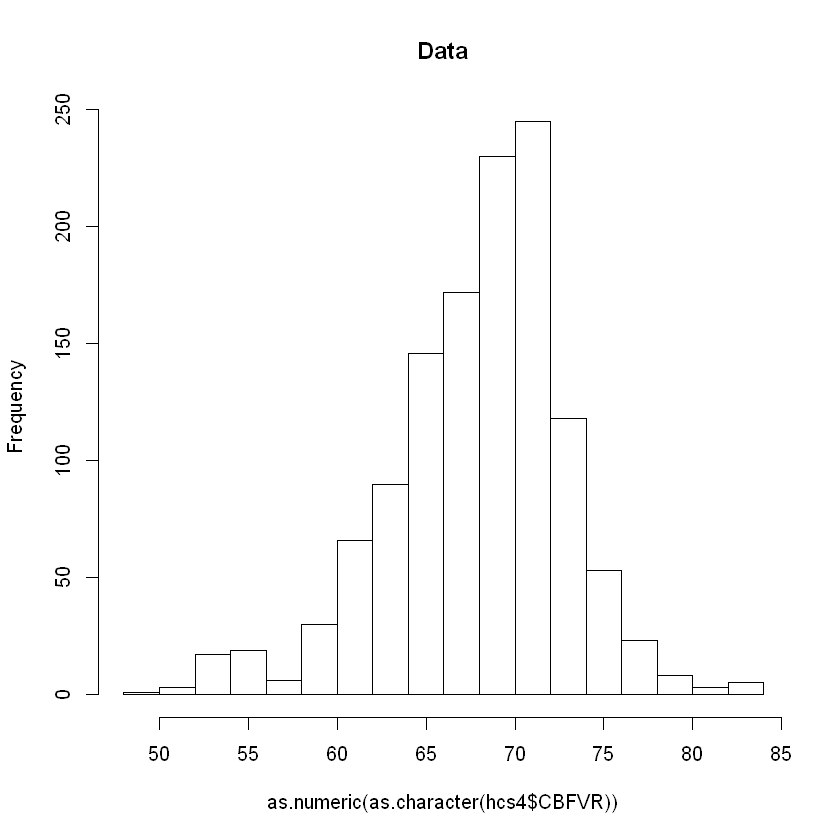

In [75]:
hist(as.numeric(as.character(hcs4$'CBFVR')), breaks = 20, main = "Data")

In [132]:
discretize(as.numeric(as.character(hcs4$'CBFVR')))

ERROR: Error in seq.default(from = r[1], to = r[2], length.out = numBins + 1): el argumento "numBins" está ausente, sin valor por omisión


In [133]:
hist(table(discretize(as.numeric(as.character(hcs4$'CBFVR')), method = "interval", breaks = 15)))
abline(v = discretize(x, method = "interval", breaks = 3, 
  onlycuts = TRUE), col = "red")

ERROR: Error in discretize(as.numeric(as.character(hcs4$CBFVR)), method = "interval", : unused arguments (method = "interval", breaks = 15)


In [134]:
x <- as.numeric(as.character(hcs4$'CBFVR'))
table(discretize(x, method = "interval", breaks = 5))
hist(x, breaks = 20, main = "Equal Interval length")
abline(v = discretize(x, method = "interval", breaks = 5, 
  onlycuts = TRUE), col = "red")

ERROR: Error in discretize(x, method = "interval", breaks = 5): unused arguments (method = "interval", breaks = 5)


In [5]:
discretize(as.numeric(as.character(hcs4$'CBFVR')), method = "frequency")

[1] [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5)
   [7] [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5)
  [13] [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5)
  [19] [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5)
  [25] [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5)
  [31] [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5)
  [37] [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5)
  [43] [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5)
  [49] [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5)
  [55] [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5)
  [61] [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5)
  [67] [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5)
  [73] [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5)
  [79] [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5)
  [85] [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5)
  [91] [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5)
  [97] [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5)
 [103] [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5)
 [109] [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5)
 [115] [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5)
 [121] [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5)
 [127] [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5)
 [133] [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5)
 [139] [66.5,70.4) [66.5,70.4) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5)
 [145] [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5)
 [151] [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5)
 [157] [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5)
 [163] [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5)
 [169] [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5)
 [175] [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5)
 [181] [49.9,66.5) [66.5,70.4) [66.5,70.4) [66.5,70.4) [66.5,70.4) [66.5,70.4)
 [187] [66.5,70.4) [66.5,70.4) [66.5,70.4) [66.5,70.4) [66.5,70.4) [66.5,70.4)
 [193] [66.5,70.4) [66.5,70.4) [66.5,70.4) [66.5,70.4) [66.5,70.4) [66.5,70.4)
 [199] [66.5,70.4) [66.5,70.4) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5)
 [205] [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5)
 [211] [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5)
 [217] [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5)
 [223] [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5)
 [229] [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5)
 [235] [66.5,70.4) [66.5,70.4) [70.4,83.1] [70.4,83.1] [70.4,83.1] [70.4,83.1]
 [241] [70.4,83.1] [70.4,83.1] [70.4,83.1] [70.4,83.1] [66.5,70.4) [66.5,70.4)
 [247] [66.5,70.4) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5)
 [253] [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5)
 [259] [66.5,70.4) [66.5,70.4) [66.5,70.4) [66.5,70.4) [49.9,66.5) [49.9,66.5)
 [265] [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5)
 [271] [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5)
 [277] [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5)
 [283] [66.5,70.4) [66.5,70.4) [66.5,70.4) [66.5,70.4) [66.5,70.4) [49.9,66.5)
 [289] [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5)
 [295] [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5)
 [301] [49.9,66.5) [49.9,66.5) [49.9,66.5) [49.9,66.5

In [137]:
discretize(as.numeric(as.character(hcs4$'CBFVR')), method = "cluster")

ERROR: Error in discretize(as.numeric(as.character(hcs4$CBFVR)), method = "cluster"): unused argument (method = "cluster")


Time,CBFVR,ABP,CBFVL,ETCO2,CrCPR,RAPR,HR,SBP,DBP,PINXR,MSER,CrCPL,RAPL,SCBFVR,DCBFVR,SCBFVL,DCBFVL,PINXL,MSEL
53.0,49.92,97.03,38.86,44.32,53.04,0.88,75.08,135.08,84.55,62.59,58.40,58.82,0.99,79.47,31.26,64.27,25.24,1.96,100
53.2,50.46,97.00,39.21,44.40,52.45,0.89,75.80,134.63,84.62,61.36,57.70,58.64,0.98,79.65,31.41,64.48,25.52,1.96,100
53.4,51.07,97.06,39.63,44.47,52.20,0.88,76.47,134.33,84.71,61.54,57.03,58.55,0.98,79.62,31.95,64.53,25.74,1.96,100
53.6,51.73,97.25,40.10,44.51,52.75,0.87,77.07,134.25,84.80,64.69,56.45,58.63,0.97,79.09,33.15,64.18,25.80,1.95,100
53.8,52.39,97.50,40.58,44.54,53.39,0.85,77.58,134.30,84.92,68.10,55.99,58.77,0.96,78.55,34.45,63.84,25.85,1.94,100
54.0,53.01,97.76,41.04,44.56,53.98,0.83,77.97,134.44,85.07,71.11,55.71,58.95,0.95,78.10,35.72,63.62,25.92,1.93,100
54.2,53.52,98.02,41.43,44.59,54.18,0.82,78.21,134.68,85.28,72.20,55.76,59.19,0.94,78.06,36.65,63.75,26.11,1.93,100
54.4,53.85,98.22,41.73,44.62,53.65,0.83,78.26,135.00,85.59,69.87,56.28,59.49,0.93,78.73,36.95,64.48,26.48,1.94,100
54.6,54.08,98.39,41.96,44.65,52.97,0.84,78.16,135.35,85.87,66.82,56.93,59.73,0.92,79.48,37.02,65.34,26.88,1.94,100
54.8,54.24,98.52,42.13,44.68,52.28,0.85,77.92,135.66,86.09,63.61,57.61,59.88,0.92,80.18,36.93,66.24,27.27,1.95,100
